LAB 8
Plotting Power Spectral Density (PSD) 
*****

PSD là một biểu đồ phổ biến trong lĩnh vực xử lý tín hiệu. Có nhiều thư viện hữu ích để tính toán PSD.
matplotlib. pyplot. csd() Function
Hàm csd() trong pyplot của thư viện matplotlib được sử dụng để vẽ mật độ phổ chéo.
Parameters: Phương pháp này chấp nhận các tham số sau được mô tả bên dưới:
	x: Tham số (chuỗi dữ liệu).
	Fs: Tham số này là vô hướng. Giá trị mặc định của nó là 2.
	window: lấy một phân đoạn dữ liệu làm đối số và trả về phiên bản có cửa sổ của phân đoạn đó. Giá trị mặc định của nó là window_hanning()
	sides: chỉ định các mặt của quang phổ sẽ trả về. Điều này có thể có các giá trị sau: 'mặc định', 'một mặt' và 'hai mặt'.
	pad_to: chứa giá trị số nguyên mà phân đoạn dữ liệu được đệm.
	NFFT: chứa số điểm dữ liệu được sử dụng trong mỗi khối cho FFT.
	detrend: chứa hàm được áp dụng cho từng phân đoạn trước khi fft-ing, được thiết kế để loại bỏ xu hướng trung bình hoặc tuyến tính {‘none’, ‘mean’, ‘linear’}.
	scale_by_freq: cho phép tích hợp trên các giá trị tần số được trả về.
	noverlap: là số điểm chồng lấp giữa các khối.
	Fc: là tần số trung tâm của x.
	return_line: bao gồm đối tượng dòng được vẽ trong các giá trị được trả về.
Returns: Điều này trả về như sau:
	Pxx: trả về các giá trị cho phổ công suất P_{xx} trước khi chia tỷ lệ.
	freqs: trả về tần số cho các phần tử trong Pxx.
	line: trả về dòng được tạo bởi chức năng này.
Kết quả (Pxx, freqs, line)





# Bài 1: Vẽ dao động tần số của hàm sin và cos 
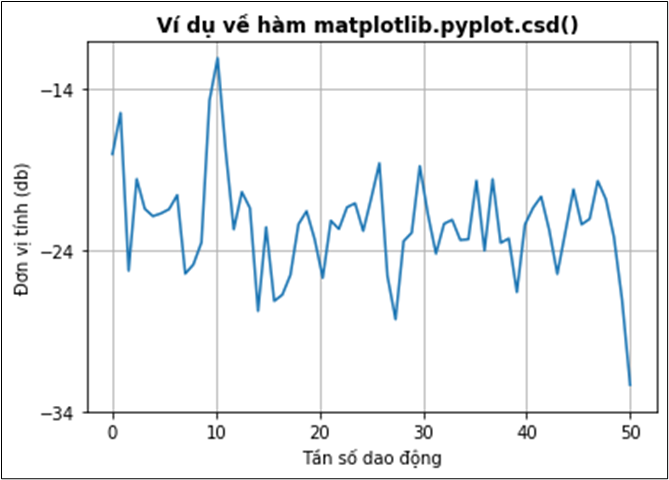

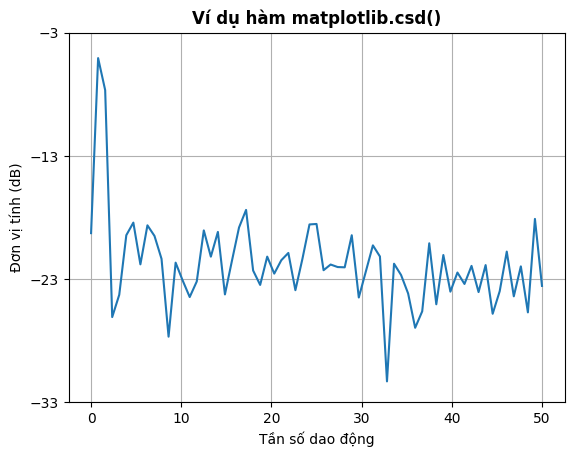

In [4]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
t = np.arange(0.0, 30.0, dt)
nse1 = np.random.randn(len(t))
nse2 = np.random.randn(len(t))

s1 = 1.5 * np.sin(2 * np.pi * t) + nse1
s2 = np.cos(np.pi * t) + nse2

plt.csd(s1, s2**2, 128, 1.0/dt)
plt.xlabel('Tần số dao động')
plt.ylabel('Đơn vị tính (dB)')
plt.title('Ví dụ hàm matplotlib.csd()', fontweight='bold')

plt.show()


# Bài 2: Thực hiện thêm subplot 

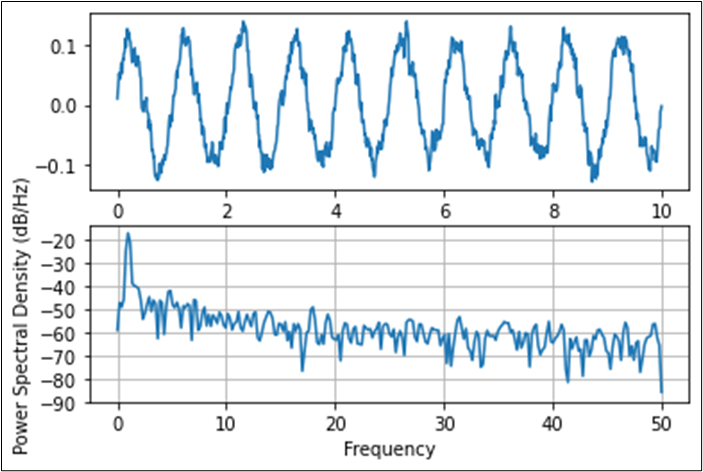

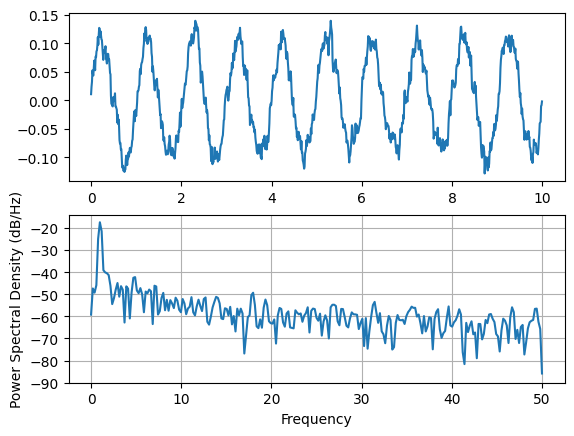

In [5]:
#Ví dụ 2
import matplotlib.pyplot as plt
import numpy as np

# Tái tạo ngẫu nhiên
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse

plt.subplot(211)
plt.plot(t, s)
plt.subplot(212)
plt.psd(s, 512, 1 / dt)

plt.show()


Bài 3: Thư viện scipy.signal
	Trước khi đi vào tính toán PSD thực tế, chúng ta cần tạo một số dữ liệu thử nghiệm. Sử dụng hai sóng hình sin ở tần số 10Hz và 60Hz. Gói phân tích tín hiệu đi tới Scipy có triển khai tính toán các biểu đồ chu kỳ có sẵn scipy.signal.periodogram. Sử dụng chúng có thể dễ dàng tính toán mật độ phổ công suất.
	Sử dụng Scipy rất đơn giản, tất cả những gì chúng ta cần cung cấp cho phương pháp biểu đồ chu kỳ là dữ liệu tín hiệu thực tế và tần số lấy mẫu.
	Những gì thu được từ phương pháp này là các thành phần tần số và mật độ công suất tương ứng.

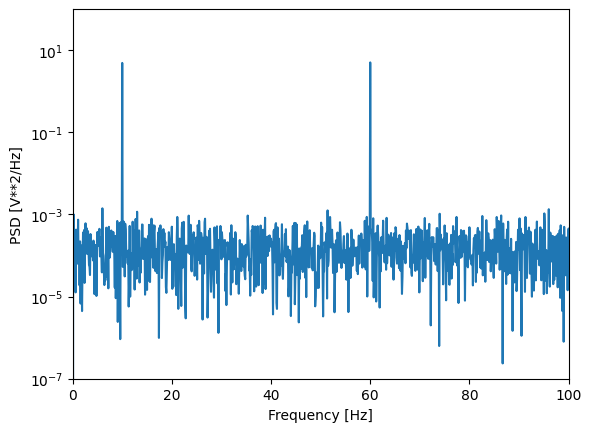

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal  # thư viện tín hiệu scipy

fs = 1000.0  # 1 kHz mẫu frequency
F1 = 10  # Thành phần tín hiệu đầu tiên ở 10 Hz
F2 = 60  # Thành phần tín hiệu thứ 2 ở 60 Hz
T = 10  # 10s độ dài tín hiệu
N0 = -10  # Mức độ ồn (dB)
t = np.r_[0:T:(1/fs)]  # Sample times

# Hai thành phần tín hiệu Sin ở tần số F1 và F2.
signal = np.sin(2 * F1 * np.pi * t) + np.sin(2 * F2 * np.pi * t)

# White noise với power N0
signal += np.random.randn(len(signal)) * 10**(N0/20.0)
#f chứa các thành phần tần số
#S là PSD
(f, S) = scipy.signal.periodogram(signal, fs, scaling='density')
plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0, 100])
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


Bài 4: Triển khai Naive Python
Tính toán PSD cho tần số [0,…100]


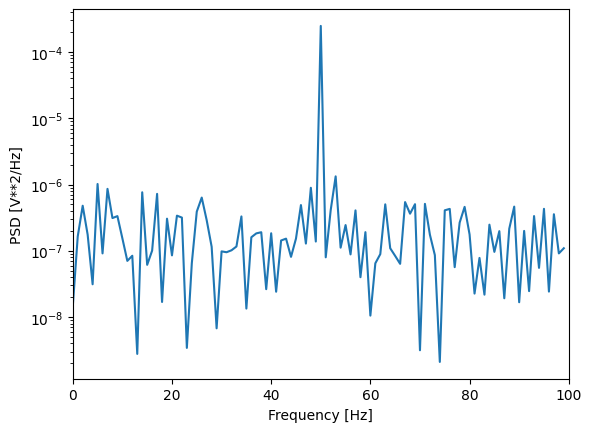

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define sample frequency and signal
Fs = 1000  # Sample frequency in Hz
t = np.arange(0, 1, 1/Fs)  # Time array
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.randn(len(t))  # Example signal with noise

def Sxx(f, signal, Fs):
    t = 1/Fs  # Sample spacing
    T = len(signal)  # Duration of the signal

    s = np.sum([signal[i] * np.exp(-1j*2*np.pi*f*i*t) for i in range(T)])

    return t**2 / T * np.abs(s)**2

# Compute PSD for f in [0, 100]
S = [Sxx(f, signal, Fs) for f in range(100)]

plt.semilogy([f for f in range(100)], S)
plt.xlim([0, 100])
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
